In [43]:
#import beberapa library yang akan digunakan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [44]:
#baca file source csv dan tambahkan kolom
df=pd.read_csv('data_survei_pasar.csv',usecols=['battery_power','clock_speed','int_memory','n_cores','ram','price_range'])

In [45]:
#preview dari bagian data urutan pertama
df.head()

,battery_power,clock_speed,int_memory,n_cores,ram,price_range
0,842,2.2,7,2,2549,1
1,1021,0.5,53,3,2631,2
2,563,0.5,41,5,2603,2
3,615,2.5,10,6,2769,2
4,1821,1.2,44,2,1411,1


In [48]:
#melihat preview bentuk dari data yang kita pakai
df.shape

(2000, 6)

In [49]:
#melihan informasi dataframe dari data kita
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   int_memory     2000 non-null   int64  
 3   n_cores        2000 non-null   int64  
 4   ram            2000 non-null   int64  
 5   price_range    2000 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 93.9 KB


In [50]:
#melihat deskripsi data kita
df.describe()

,battery_power,clock_speed,int_memory,n_cores,ram,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,32.046500,4.520500,2124.213000,1.500000
std,439.418206,0.816004,18.145715,2.287837,1084.732044,1.118314
min,501.000000,0.500000,2.000000,1.000000,256.000000,0.000000
25%,851.750000,0.700000,16.000000,3.000000,1207.500000,0.750000
50%,1226.000000,1.500000,32.000000,4.000000,2146.500000,1.500000
75%,1615.250000,2.200000,48.000000,7.000000,3064.500000,2.250000
max,1998.000000,3.000000,64.000000,8.000000,3998.000000,3.000000


In [51]:
#membersihkan data yang memiliki nilai kosong
df.isnull().sum()

battery_power    0
clock_speed      0
int_memory       0
n_cores          0
ram              0
price_range      0
dtype: int64

In [52]:
#recall data kita
df.head()

,battery_power,clock_speed,int_memory,n_cores,ram,price_range
0,842,2.2,7,2,2549,1
1,1021,0.5,53,3,2631,2
2,563,0.5,41,5,2603,2
3,615,2.5,10,6,2769,2
4,1821,1.2,44,2,1411,1


In [53]:
#buat variabel X dan Y
x=df.drop(columns='price_range')
y=df['price_range']

In [54]:
#kita split data kita menjadi training and testing dengan porsi 80:20
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [56]:
#Cek shape dari data training dan testing
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1600, 5)
(1600,)
(400, 5)
(400,)


In [57]:
#kita buat object regresi linear
lin_reg=LinearRegression()

In [58]:
#train model tersebut  menggunakan training data yang sudah displit
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
#cari tau nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[ 0.00051311 -0.02619491  0.00095355  0.0080132   0.0009384 ]
-1.1507321765699041


In [60]:
#Kita coba buat kedalam dataframe agar kebih rapi
coef_dict={'features':x.columns,'coef_value':lin_reg.coef_}
coef=pd.DataFrame(coef_dict,columns=['features','coef_value'])
coef

,features,coef_value
0,battery_power,0.000513
1,clock_speed,-0.026195
2,int_memory,0.000954
3,n_cores,0.008013
4,ram,0.000938


In [61]:
y_pred=lin_reg.predict(x_test)

In [62]:
#kita cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit
lin_reg.score(x_test,y_test)

0.8849766289852035

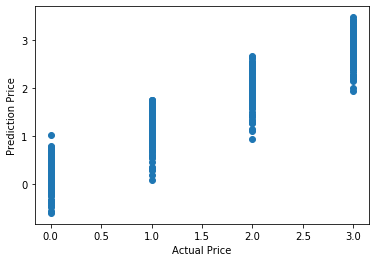

In [63]:
#tampilkan plot prediksi harganya 
y_prediksi=lin_reg.predict(x_test)
plt.scatter(y_test,y_prediksi)
plt.xlabel('Actual Price')
plt.ylabel('Prediction Price')
plt.show()

In [67]:
#kita prediksi harga sebuah smartphone dengan spesifikasi
#battery_power 3000 Mh
#clock_speed 2.5 Ghz
#int_memory 32 GB
#n_cores 8 core
#ram 8000 MB

lin_reg.predict([[3000,2.5,32,8,8000]])


array([7.92494749])

In [69]:
print: "Jadi harga dari handphone berspesifikasi tersebut diatas adalah sekitar Rp 7.924.947,49"